In [1]:
import pandas as pd, numpy as np
import os
import mne

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import seaborn as sns

# load features and check numbers

In [5]:
df_allfeatures = pd.read_csv("allFeatures_evoked.csv",sep="\t")

In [6]:
df_allfeatures.shape

(96, 14337)

In [7]:
df_allfeatures.columns

Index(['Unnamed: 0', 'evoked_Amplitude_Mean_Fp1_0',
       'evoked_Amplitude_Mean_Fp1_1', 'evoked_Amplitude_Mean_Fp1_2',
       'evoked_Amplitude_Mean_Fp1_3', 'evoked_Amplitude_Mean_Fp1_4',
       'evoked_Amplitude_Mean_Fp1_5', 'evoked_Amplitude_Mean_Fp1_6',
       'evoked_Amplitude_Mean_Fp1_7', 'evoked_Amplitude_Mean_Fp2_0',
       ...
       'evoked_Autocorrel_Lag20_TP9_6', 'evoked_Autocorrel_Lag20_TP9_7',
       'evoked_Autocorrel_Lag20_TP10_0', 'evoked_Autocorrel_Lag20_TP10_1',
       'evoked_Autocorrel_Lag20_TP10_2', 'evoked_Autocorrel_Lag20_TP10_3',
       'evoked_Autocorrel_Lag20_TP10_4', 'evoked_Autocorrel_Lag20_TP10_5',
       'evoked_Autocorrel_Lag20_TP10_6', 'evoked_Autocorrel_Lag20_TP10_7'],
      dtype='object', length=14337)

In [9]:
df_allfeatures.filter(like="Autocorrel",axis=1).shape

(96, 4480)

In [10]:
df_allfeatures.filter(like="Intercorrel_",axis=1).shape

(96, 6272)

intercorrels should be less, namely 28*27/2 * 8 = 3024

here it is 28*28*8

In [12]:
14336-6272-4480

3584

remaining features ok!

In [11]:
df_allfeatures.head()

Unnamed: 0  evoked_Amplitude_Mean_Fp1_0  evoked_Amplitude_Mean_Fp1_1  \
0    AAR23B1                -1.191249e-06                    -0.000001   
1    ACE11B1                -8.748528e-06                    -0.000007   
2    ADD25P1                 1.222105e-07                    -0.000002   
3     AGI16S                -7.478483e-07                    -0.000003   
4    AHR27N1                -1.580223e-06                    -0.000001   

   evoked_Amplitude_Mean_Fp1_2  evoked_Amplitude_Mean_Fp1_3  \
0                -4.784164e-07                 3.795333e-07   
1                -6.867992e-06                -1.084665e-05   
2                -2.503591e-06                -3.349028e-06   
3                -2.255719e-06                -1.092346e-06   
4                -1.035713e-06                 4.668880e-07   

   evoked_Amplitude_Mean_Fp1_4  evoked_Amplitude_Mean_Fp1_5  \
0                -5.139844e-07                -1.144764e-07   
1                -4.835523e-06                 1.542907e-07   
2                -3.394272e-06                -1.085410e-06   
3                -1.234230e-06                -1.964641e-07   
4                 1.171279e-06                 2.758221e-07   

   evoked_Amplitude_Mean_Fp1_6  evoked_Amplitude_Mean_Fp1_7  \
0                 2.748487e-07                 2.642970e-07   
1                -5.960795e-07                -4.388691e-06   
2                -7.277454e-07                -2.582829e-07   
3                -6.549131e-07                -1.418684e-06   
4                 2.428262e-07                -5.111694e-07   

   evoked_Amplitude_Mean_Fp2_0               ...                \
0                -1.100876e-06               ...                 
1                -9.451876e-06               ...                 
2                -4.879038e-07               ...                 
3                -7.730248e-07               ...                 
4                -1.024458e-06               ...                 

   evoked_Autocorrel_Lag20_TP9_6  evoked_Autocorrel_Lag20_TP9_7  \
0                      -0.040740                      -0.185246   
1                       0.045479                      -0.135423   
2                       0.112167                       0.051840   
3                      -0.241914                       0.320503   
4                       0.268584                       0.011043   

   evoked_Autocorrel_Lag20_TP10_0  evoked_Autocorrel_Lag20_TP10_1  \
0                       -0.060962                        0.032352   
1                       -0.122848                        0.257000   
2                       -0.144975                        0.235009   
3                        0.117046                        0.067361   
4                        0.111439                       -0.001942   

   evoked_Autocorrel_Lag20_TP10_2  evoked_Autocorrel_Lag20_TP10_3  \
0                       -0.077241                        0.067086   
1                       -0.104902                       -0.027475   
2                        0.008257                       -0.094477   
3                        0.065578                       -0.108100   
4                        0.028238                       -0.022584   

   evoked_Autocorrel_Lag20_TP10_4  evoked_Autocorrel_Lag20_TP10_5  \
0                       -0.055013                       -0.098508   
1                       -0.128001                        0.006574   
2                       -0.079087                        0.004933   
3                       -0.056630                        0.191966   
4                       -0.041433                        0.020675   

   evoked_Autocorrel_Lag20_TP10_6  evoked_Autocorrel_Lag20_TP10_7  
0                        0.227843                        0.074327  
1                        0.335306                       -0.166995  
2                        0.364960                        0.099022  
3                        0.012997                       -0.139446  
4                        0.209148  

In [13]:
df_allfeatures.isna().sum().sum()

0

# get heatmap for amplitudes for groups

In [12]:
evokeds = os.listdir("../09_PreparationEEG/evoked__MovingWindowPeakToPeak/")

In [13]:
ev = mne.read_evokeds("../09_PreparationEEG/evoked/"+evokeds[3])[0]

Reading ../09_PreparationEEG/evoked/AGI16S-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.26 * stim_3 + 0.24 * stim_4)
        0 CTF compensation matrices available
        nave = 234 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied


In [44]:
alldata = np.zeros((28,250,96))

In [45]:
for i in range(len(evokeds)):
    evo = evokeds[i]
    ev = mne.read_evokeds("../09_PreparationEEG/evoked/"+evo)[0]
    data = ev._data[:,1:]
    alldata[:,:,i] =data 


Reading ../09_PreparationEEG/evoked/AAR23B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 240 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/ACE11B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 238 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/ADD25P1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.26 * stim_1 + 0.26 * stim_2 + 0.24 * stim_3 + 0.24 * stim_4)
        0 CTF compensat

No baseline correction applied
Reading ../09_PreparationEEG/evoked/BMR01N1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.23 * stim_1 + 0.26 * stim_2 + 0.26 * stim_3 + 0.24 * stim_4)
        0 CTF compensation matrices available
        nave = 197 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/BRH18F1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 240 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/BRL04L1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * 

No baseline correction applied
Reading ../09_PreparationEEG/evoked/GWD17F1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 240 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/HHB22B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 237 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/HTV10S1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * 

No baseline correction applied
Reading ../09_PreparationEEG/evoked/MAI03B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 236 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/MAL03R1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.24 * stim_4)
        0 CTF compensation matrices available
        nave = 237 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/MBA25B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.24 * stim_3 + 0.25 * 

No baseline correction applied
Reading ../09_PreparationEEG/evoked/SJO18S1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.27 * stim_2 + 0.25 * stim_3 + 0.24 * stim_4)
        0 CTF compensation matrices available
        nave = 199 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/SKB08F1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 240 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
Reading ../09_PreparationEEG/evoked/SMS30P1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * 

In [46]:
evokeds_short = [x.split("-")[0] for x in evokeds]

In [47]:


def correctNames(x):
    if x.endswith("1"):
        return x[:-1]
    else:
        return x

evokeds_short = list(map(lambda x: correctNames(x) ,evokeds_short))

In [48]:
evokeds_short

['AAR23B',
 'ACE11B',
 'ADD25P',
 'AGI16S',
 'AHR27N',
 'AIV25B',
 'AJH13B',
 'AJL30S',
 'AKK31B',
 'ARL17K',
 'ARO12C',
 'ATO21W',
 'AVR16F',
 'AWJ28B',
 'BAM16A',
 'BDR13B',
 'BDS23B',
 'BGI23S',
 'BHC19K',
 'BMI31E',
 'BML24M',
 'BMR01N',
 'BRH18F',
 'BRL04L',
 'BRS27B',
 'BSE11B',
 'BWR08M',
 'CAB19N',
 'CBV10N',
 'CFF19P',
 'CGC24W',
 'CMT16M',
 'CUM15K',
 'EFN26K',
 'EJA24B',
 'EJE29B',
 'EMG01D',
 'EMN30M',
 'ERT08F',
 'GAK15L',
 'GFD21N',
 'GKN11N',
 'GWD17F',
 'HHB22B',
 'HTV10S',
 'HWH15C',
 'IGN31N',
 'IJO20G',
 'IMA20B',
 'ITE03D',
 'JAT08L',
 'JJR09B',
 'JRB09F',
 'JRR03B',
 'KAA24N',
 'KAE12N',
 'KEE25B',
 'KHB16F',
 'KHM10S',
 'KJF03S',
 'KMS05F',
 'KRV24K',
 'LRM12B',
 'MAI03B',
 'MAL03R',
 'MBA25B',
 'MFB01B',
 'MGK07B',
 'MHU07N',
 'MLS07B',
 'MMN14M',
 'MMT07H',
 'MNI23B',
 'MSJ07H',
 'MTC06B',
 'MTF03B',
 'MUH04O',
 'MWA27N',
 'NVM07B',
 'RAD19B',
 'SBL15H',
 'SHT02N',
 'SJA02B',
 'SJN01B',
 'SJO18S',
 'SKB08F',
 'SMS30P',
 'THV03F',
 'TSL14D',
 'UFA18E',
 'USM08B',

In [63]:
labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")




In [35]:
evokeds

['AAR23B',
 'ACE11B',
 'ADD25P',
 'AGI16S',
 'AHR27N',
 'AIV25B',
 'AJH13B',
 'AJL30S',
 'AKK31B',
 'ARL17K',
 'ARO12C',
 'ATO21W',
 'AVR16F',
 'AWJ28B',
 'BAM16A',
 'BDR13B',
 'BDS23B',
 'BGI23S',
 'BHC19K',
 'BMI31E',
 'BML24M',
 'BMR01N',
 'BRH18F',
 'BRL04L',
 'BRS27B',
 'BSE11B',
 'BWR08M',
 'CAB19N',
 'CBV10N',
 'CFF19P',
 'CGC24W',
 'CMT16M',
 'CUM15K',
 'EFN26K',
 'EJA24B',
 'EJE29B',
 'EMG01D',
 'EMN30M',
 'ERT08F',
 'GAK15L',
 'GFD21N',
 'GKN11N',
 'GWD17F',
 'HHB22B',
 'HTV10S',
 'HWH15C',
 'IGN31N',
 'IJO20G',
 'IMA20B',
 'ITE03D',
 'JAT08L',
 'JJR09B',
 'JRB09F',
 'JRR03B',
 'KAA24N',
 'KAE12N',
 'KEE25B',
 'KHB16F',
 'KHM10S',
 'KJF03S',
 'KMS05F',
 'KRV24K',
 'LRM12B',
 'MAI03B',
 'MAL03R',
 'MBA25B',
 'MFB01B',
 'MGK07B',
 'MHU07N',
 'MLS07B',
 'MMN14M',
 'MMT07H',
 'MNI23B',
 'MSJ07H',
 'MTC06B',
 'MTF03B',
 'MUH04O',
 'MWA27N',
 'NVM07B',
 'RAD19B',
 'SBL15H',
 'SHT02N',
 'SJA02B',
 'SJN01B',
 'SJO18S',
 'SKB08F',
 'SMS30P',
 'THV03F',
 'TSL14D',
 'UFA18E',
 'USM08B',

In [64]:
labels.loc["BDS23B"] = labels.loc["BDS23S"]

#.set_index("Subject_ID")



In [31]:
evokeds

['AAR23B1-ave.fif',
 'ACE11B1-ave.fif',
 'ADD25P1-ave.fif',
 'AGI16S-ave.fif',
 'AHR27N1-ave.fif',
 'AIV25B1-ave.fif',
 'AJH13B1-ave.fif',
 'AJL30S1-ave.fif',
 'AKK31B1-ave.fif',
 'ARL17K1-ave.fif',
 'ARO12C-ave.fif',
 'ATO21W1-ave.fif',
 'AVR16F1-ave.fif',
 'AWJ28B1-ave.fif',
 'BAM16A1-ave.fif',
 'BDR13B1-ave.fif',
 'BDS23B1-ave.fif',
 'BGI23S1-ave.fif',
 'BHC19K1-ave.fif',
 'BMI31E1-ave.fif',
 'BML24M1-ave.fif',
 'BMR01N1-ave.fif',
 'BRH18F1-ave.fif',
 'BRL04L1-ave.fif',
 'BRS27B1-ave.fif',
 'BSE11B1-ave.fif',
 'BWR08M1-ave.fif',
 'CAB19N1-ave.fif',
 'CBV10N1-ave.fif',
 'CFF19P1-ave.fif',
 'CGC24W1-ave.fif',
 'CMT16M1-ave.fif',
 'CUM15K1-ave.fif',
 'EFN26K1-ave.fif',
 'EJA24B1-ave.fif',
 'EJE29B1-ave.fif',
 'EMG01D-ave.fif',
 'EMN30M1-ave.fif',
 'ERT08F1-ave.fif',
 'GAK15L1-ave.fif',
 'GFD21N1-ave.fif',
 'GKN11N1-ave.fif',
 'GWD17F1-ave.fif',
 'HHB22B1-ave.fif',
 'HTV10S1-ave.fif',
 'HWH15C1-ave.fif',
 'IGN31N1-ave.fif',
 'IJO20G1-ave.fif',
 'IMA20B1-ave.fif',
 'ITE03D1-ave.fif',
 'J

In [53]:
evokeds_short.index("BHC19K")

18

In [ ]:
alldata = alldata[::,0:18]

In [69]:
alldata = np.delete(alldata,18,axis=2)

In [65]:
labels =labels.drop(['BDS23S', 'EKC18D', 'MMK25B'])

In [71]:
labels = labels.reset_index()

In [89]:
implPLUS = labels[labels.ImplizitesLernen_dich ==1].index

implMINUS = labels[labels.ImplizitesLernen_dich ==0].index

explPLUS = labels[labels.ExplizitesLernen_dich ==1].index

explMINUS = labels[labels.ExplizitesLernen_dich ==0].index

In [90]:
implPLUS = alldata.take(implPLUS,axis=2).mean(axis=2)
implMINUS = alldata.take(implMINUS,axis=2).mean(axis=2)
explPLUS = alldata.take(explPLUS,axis=2).mean(axis=2)
explMINUS = alldata.take(explMINUS,axis=2).mean(axis=2)

In [122]:
IP_EP = labels[(labels.ImplizitesLernen_dich ==1) & 
               (labels.ExplizitesLernen_dich ==1)].index

IP_EM = labels[(labels.ImplizitesLernen_dich ==1) & 
               (labels.ExplizitesLernen_dich ==0)].index
IM_EP = labels[(labels.ImplizitesLernen_dich ==0) & 
               (labels.ExplizitesLernen_dich ==1)].index
IM_EM = labels[(labels.ImplizitesLernen_dich ==0) & 
               (labels.ExplizitesLernen_dich ==0)].index

In [123]:
IP_EP = alldata.take(IP_EP,axis=2).mean(axis=2)
IP_EM = alldata.take(IP_EM,axis=2).mean(axis=2)
IM_EP = alldata.take(IM_EP,axis=2).mean(axis=2)
IM_EM = alldata.take(IM_EM,axis=2).mean(axis=2)

In [125]:
df_IP_EP = pd.DataFrame(
    IP_EP, 
    index=ev.ch_names, 
    columns=range(-200,800,4))*1000000.0
df_IP_EM = pd.DataFrame(
    IP_EM, 
    index=ev.ch_names, 
    columns=range(-200,800,4))*1000000.0
df_IM_EP = pd.DataFrame(
    IM_EP, 
    index=ev.ch_names, 
    columns=range(-200,800,4))*1000000.0
df_IM_EM = pd.DataFrame(
    IM_EM, 
    index=ev.ch_names, 
    columns=range(-200,800,4))*1000000.0

In [92]:
df_means = pd.DataFrame(meanval, index=ev.ch_names, columns=range(-200,800,4))

In [93]:
df_means = df_means*1000000.0

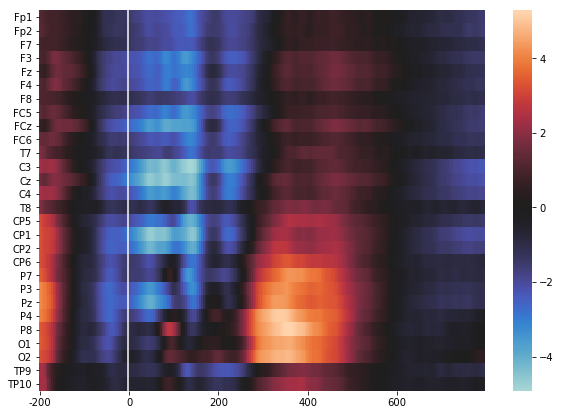

In [96]:
fig, ax = plt.subplots(
figsize=(10,7)
        )         # Sample figsize in inches

sns.heatmap(df_means.loc[:,:], center=0  ,
            
            

yticklabels=True,
            xticklabels = 50,
        ax=ax)

ax.vlines([50], *ax.get_xlim(),colors='white')

In [115]:
df_implPLUS = pd.DataFrame(
    implPLUS, 
    index=ev.ch_names, 
    columns=range(-200,800,4))*1000000.0
df_implMINUS = pd.DataFrame(
    implMINUS, 
    index=ev.ch_names, 
    columns=range(-200,800,4))*1000000.0
df_explPLUS = pd.DataFrame(
    explPLUS, 
    index=ev.ch_names, 
    columns=range(-200,800,4))*1000000.0
df_explMINUS = pd.DataFrame(
    explMINUS, 
    index=ev.ch_names, 
    columns=range(-200,800,4))*1000000.0

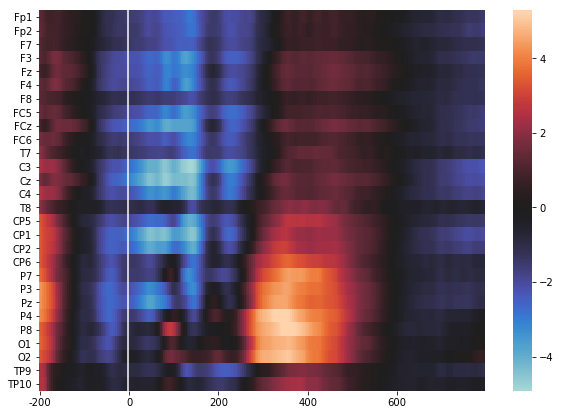

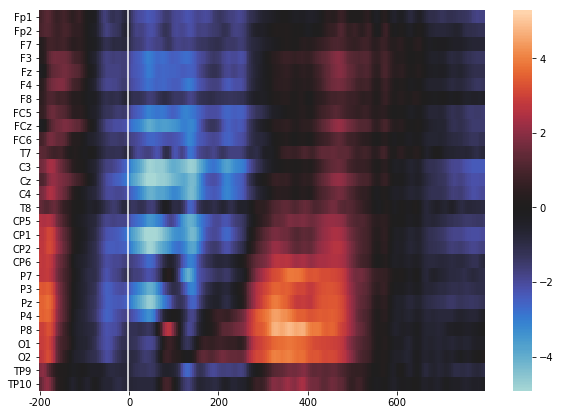

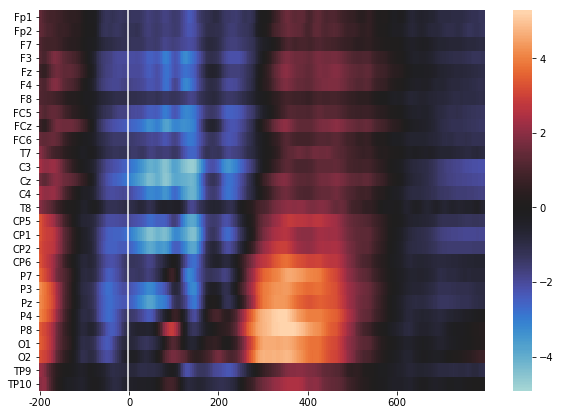

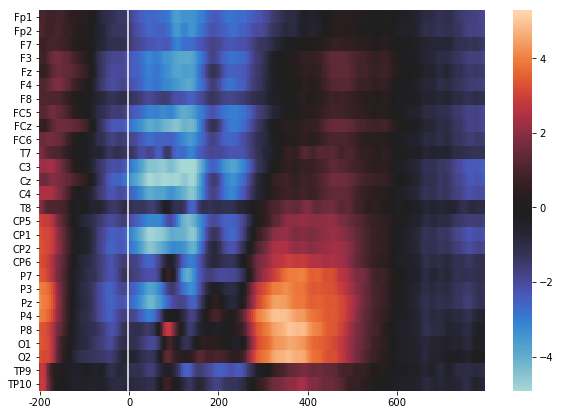

In [116]:
for df in [df_implPLUS,df_implMINUS,df_explPLUS,df_explMINUS]:
    fig, ax = plt.subplots(
    figsize=(10,7)
            )
    sns.heatmap(df, center=0 ,
                vmax =df_means.values.max(),
                vmin =df_means.values.min(),
                
                yticklabels=True,
                xticklabels = 50, ax=ax)

    ax.vlines([50], *ax.get_xlim(),colors='white')

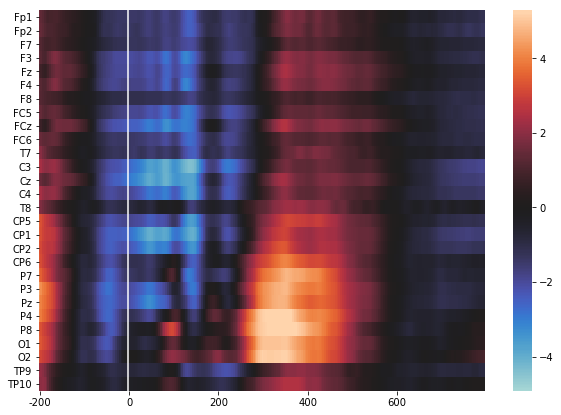

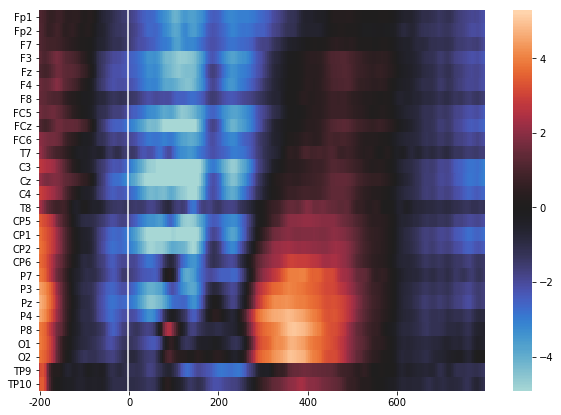

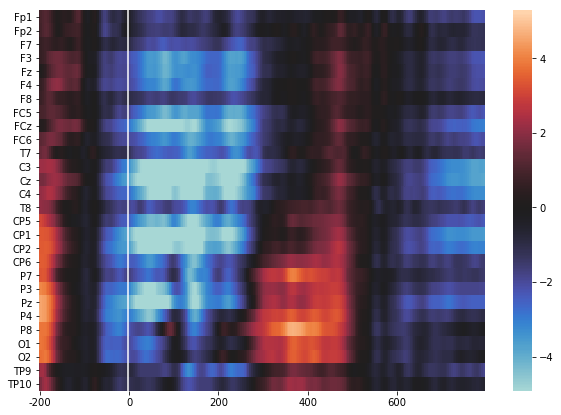

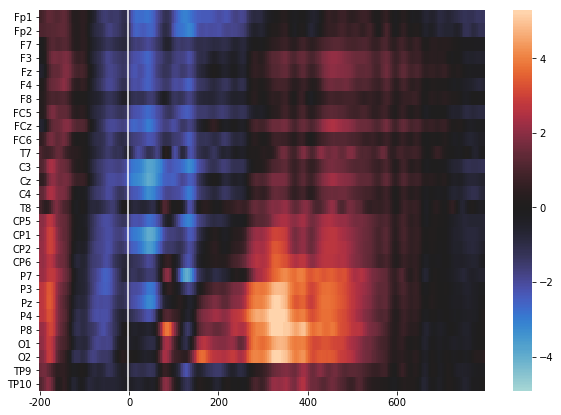

In [126]:
for df in [df_IP_EP,df_IP_EM,df_IM_EP,df_IM_EM]:
    fig, ax = plt.subplots(
    figsize=(10,7)
            )
    sns.heatmap(df, center=0 ,
                vmax =df_means.values.max(),
                vmin =df_means.values.min(),
                
                yticklabels=True,
                xticklabels = 50, ax=ax)

    ax.vlines([50], *ax.get_xlim(),colors='white')

In [130]:
labels.groupby(["ExplizitesLernen_dich","ImplizitesLernen_dich"]).size()

ExplizitesLernen_dich  ImplizitesLernen_dich
0.0                    0.0                      10
                       1.0                      27
1.0                    0.0                       9
                       1.0                      49
dtype: int64

In [133]:
df_IM_EM_DIFF =df_IM_EM - (              9*df_IM_EP+ 27*df_IP_EM+ 49*df_IP_EP)/(9+27+49)
df_IP_EM_DIFF =df_IP_EM - (10*df_IM_EM + 9*df_IM_EP+              49*df_IP_EP)/(9+10+49)
df_IM_EP_DIFF =df_IM_EP - (10*df_IM_EM +             27*df_IP_EM+ 49*df_IP_EP)/(10+27+49)
df_IP_EP_DIFF =df_IP_EP - (10*df_IM_EM + 9*df_IM_EP+ 27*df_IP_EM                )/(9+27+10)

## heatmaps for differences of four groups

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


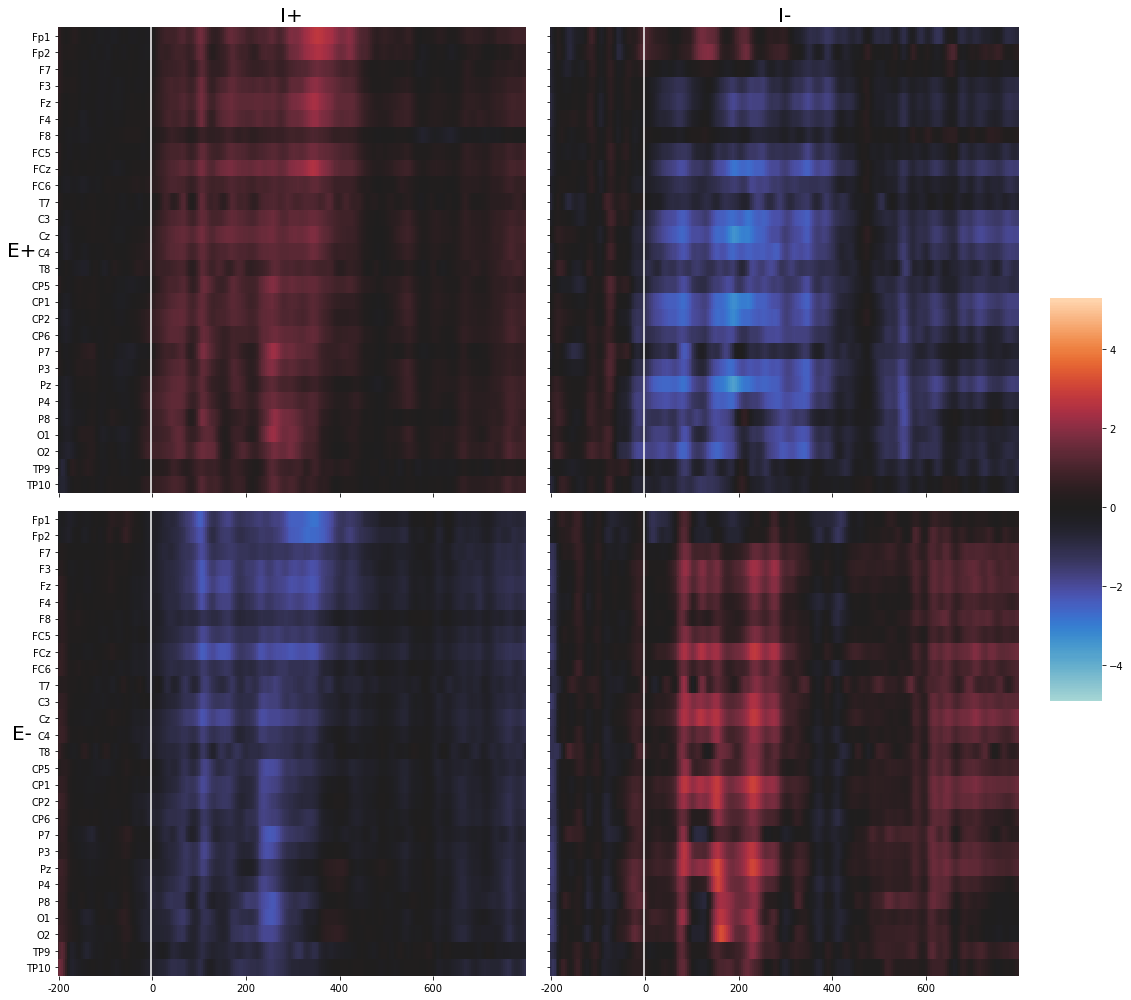

In [156]:

dfs = [df_IP_EP_DIFF,df_IM_EP_DIFF,df_IP_EM_DIFF,df_IM_EM_DIFF ]
dfs_ = ["df_IP_EP_DIFF","df_IM_EP_DIFF","df_IP_EM_DIFF","df_IM_EM_DIFF" ]

fig, axn = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(24,14))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    x = sns.heatmap(dfs[i], ax=ax,
                    center=0,yticklabels=True,
                            vmax =df_means.values.max(),
                vmin =df_means.values.min(),
            xticklabels = 50,
                    
                    
                cbar=i == 0,                
                cbar_ax=None if i else cbar_ax)
    ax.vlines([50], *ax.get_xlim(),colors='white')

cols = ["I+","I-"]
rows = ["E+","E-"]

for ax, col in zip(axn[0], cols):
    ax.set_title(col,size=20)

for ax, row in zip(axn[:,0], rows):
    ax.set_ylabel(row, rotation=0, size=20)

fig.tight_layout(rect=[0.3, 0, .9, 1])

## group of heatmaps for absolute values

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


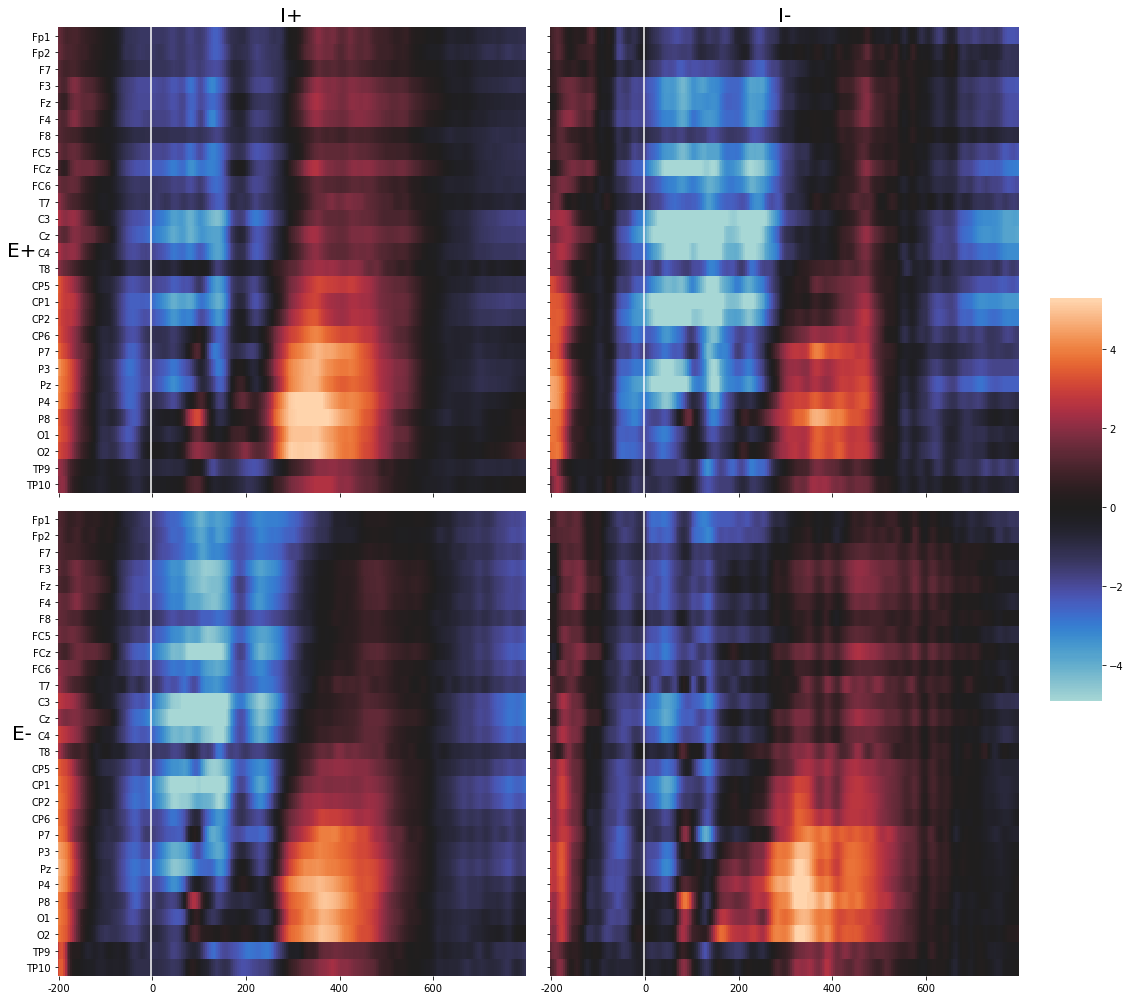

In [157]:
dfs = [df_IP_EP,df_IM_EP,df_IP_EM,df_IM_EM ]
dfs_ = ["df_IP_EP_DIFF","df_IM_EP_DIFF","df_IP_EM_DIFF","df_IM_EM_DIFF" ]

fig, axn = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(24,14))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    x = sns.heatmap(dfs[i], ax=ax,
                    center=0,yticklabels=True,
                            vmax =df_means.values.max(),
                vmin =df_means.values.min(),
            xticklabels = 50,
                    
                    
                cbar=i == 0,                
                cbar_ax=None if i else cbar_ax)
    ax.vlines([50], *ax.get_xlim(),colors='white')

cols = ["I+","I-"]
rows = ["E+","E-"]

for ax, col in zip(axn[0], cols):
    ax.set_title(col,size=20)

for ax, row in zip(axn[:,0], rows):
    ax.set_ylabel(row, rotation=0, size=20)

fig.tight_layout(rect=[0.3, 0, .9, 1])

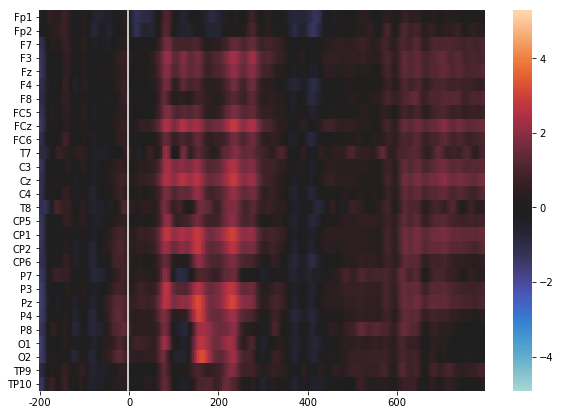

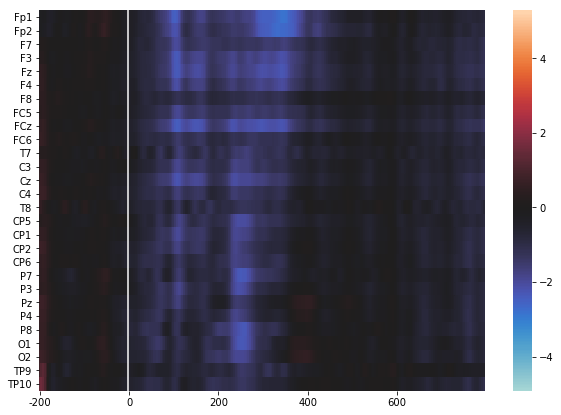

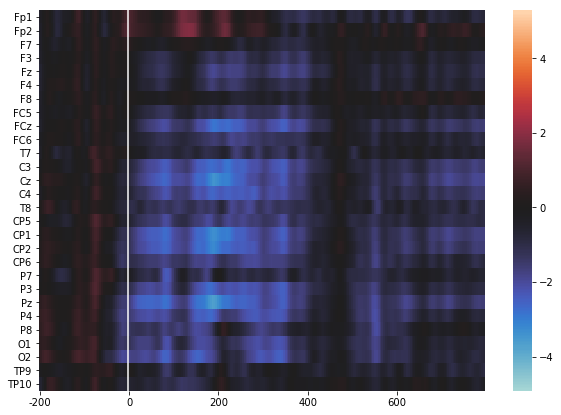

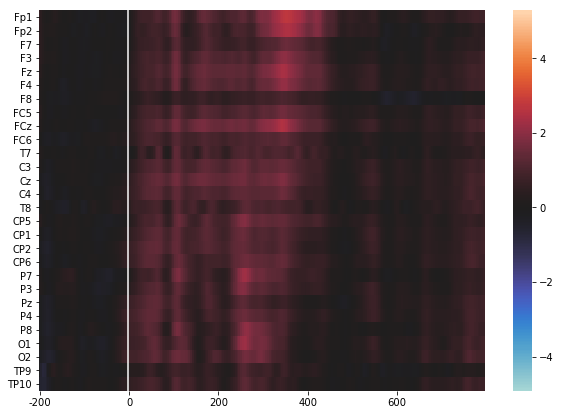

In [134]:
fig, ax = plt.subplots(
figsize=(10,7)
        )
sns.heatmap(df_IM_EM_DIFF, center=0,yticklabels=True,
                            vmax =df_means.values.max(),
                vmin =df_means.values.min(),
            xticklabels = 50, ax=ax)

ax.vlines([50], *ax.get_xlim(),colors='white')

fig, ax = plt.subplots(
figsize=(10,7)
        )
sns.heatmap(df_IP_EM_DIFF, center=0 ,yticklabels=True,
                            vmax =df_means.values.max(),
                vmin =df_means.values.min(),
            xticklabels = 50, ax=ax)

ax.vlines([50], *ax.get_xlim(),colors='white')
fig, ax = plt.subplots(
figsize=(10,7)
        )
sns.heatmap(df_IM_EP_DIFF, center=0,yticklabels=True,
                            vmax =df_means.values.max(),
                vmin =df_means.values.min(),
            xticklabels = 50, ax=ax)

ax.vlines([50], *ax.get_xlim(),colors='white')

fig, ax = plt.subplots(
figsize=(10,7)
        )
sns.heatmap(df_IP_EP_DIFF, center=0 ,yticklabels=True,
                            vmax =df_means.values.max(),
                vmin =df_means.values.min(),
            xticklabels = 50, ax=ax)

ax.vlines([50], *ax.get_xlim(),colors='white')

In [119]:
df_implDIFF = df_implPLUS- df_implMINUS

In [120]:
df_explDIFF = df_explPLUS - df_explMINUS

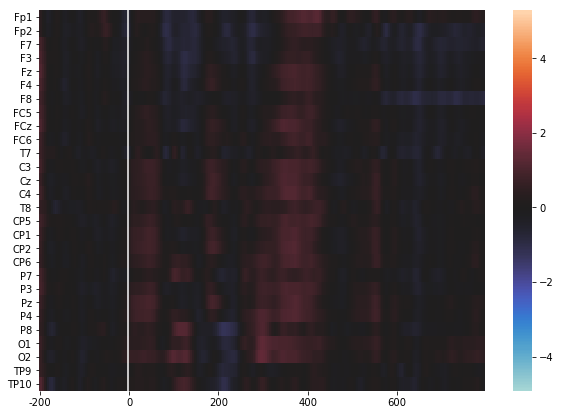

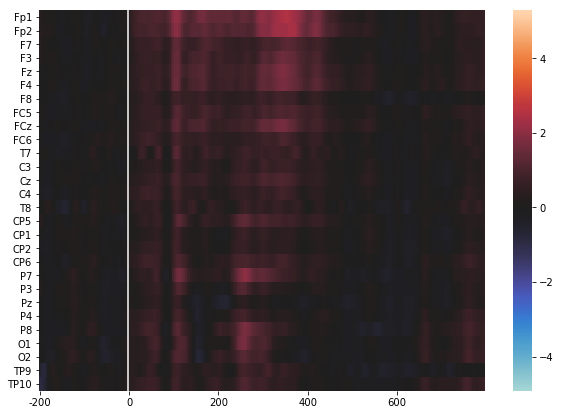

In [121]:
fig, ax = plt.subplots(
figsize=(10,7)
        )
sns.heatmap(df_implDIFF, center=0,yticklabels=True,
                            vmax =df_means.values.max(),
                vmin =df_means.values.min(),
            xticklabels = 50, ax=ax)

ax.vlines([50], *ax.get_xlim(),colors='white')

fig, ax = plt.subplots(
figsize=(10,7)
        )
sns.heatmap(df_explDIFF, center=0 ,yticklabels=True,
                            vmax =df_means.values.max(),
                vmin =df_means.values.min(),
            xticklabels = 50, ax=ax)

ax.vlines([50], *ax.get_xlim(),colors='white')

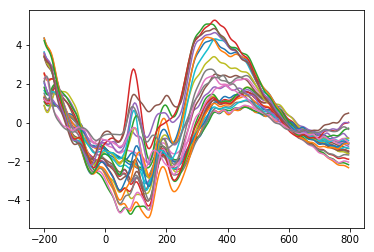

In [119]:
x = plt.plot(df_means.transpose())

In [136]:
meanval.shape

meanval_new = np.ones((28,251))

meanval_new[:,1:251] =meanval

meanval_new[:,0] = meanval_new[:,1]

ev.data = meanval_new

(28, 250)

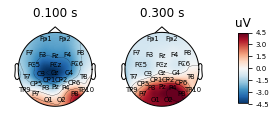

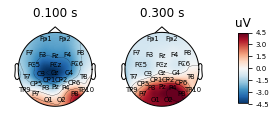

In [192]:

ev.plot_topomap([0.1,0.300],show_names = True)


# get 2d correlations

In [10]:
labels = pd.read_csv("../07_Feature_Preprocessing/label_data_complete.txt",
                     sep="\t", decimal=',').set_index("Subject_ID")

feats = pd.read_csv(
    "allFeatures_evoked.csv"
    , sep="\t",index_col=0
)

feats.index.name = "Subject_ID"

list(feats.index)
def correctNames(x):
    if x.endswith("1"):
        return x[:-1]
    else:
        return x

feats.index = map(lambda x: correctNames(x) ,feats.index)

labels.loc["BDS23B"] = labels.loc["BDS23S"]

#.set_index("Subject_ID")



feats = feats.sort_index()

joinedDF = feats.join(labels, how="inner")

joinedDF.shape

(95, 14340)

In [8]:
corrs = joinedDF.corr().loc[:, ["ExplizitesLernen_kont","ImplizitesLernen_kont"]].drop(joinedDF.columns[-5:])

In [9]:
corrs = corrs.fillna(0)

In [163]:
corrs.sort_values("ExplizitesLernen_kont").head()

ExplizitesLernen_kont  ImplizitesLernen_kont
evoked_Latency_Onset50%Max_FC5_4              -0.401465               0.119355
evoked_Intercorrel_Cz-T8_1                    -0.381233               0.228198
evoked_Intercorrel_T8-Cz_1                    -0.381233               0.228198
evoked_Intercorrel_T8-F3_1                    -0.378629               0.160110
evoked_Intercorrel_F3-T8_1                    -0.378629               0.160110

In [164]:
corrs.sort_values("ExplizitesLernen_kont").tail()

ExplizitesLernen_kont  \
evoked_Autocorrel_Lag7_Cz_1                        0.412598   
evoked_Amplitude_PeakGlobalMax_FC5_4               0.412744   
evoked_Amplitude_Mean_FC5_4                        0.413828   
evoked_Amplitude_PeakLocalMin_FC5_4                0.417031   
evoked_Area_Pos_FC5_4                              0.433126   

                                      ImplizitesLernen_kont  
evoked_Autocorrel_Lag7_Cz_1                       -0.167975  
evoked_Amplitude_PeakGlobalMax_FC5_4              -0.225659  
evoked_Amplitude_Mean_FC5_4                       -0.156404  
evoked_Amplitude_PeakLocalMin_FC5_4               -0.094686  
evoked_Area_Pos_FC5_4                             -0.161772

In [166]:
corrs.sort_values("ImplizitesLernen_kont").head()

ExplizitesLernen_kont  \
evoked_Autocorrel_Lag12_C4_3                    0.277653   
evoked_Autocorrel_Lag12_P3_2                    0.256578   
evoked_Autocorrel_Lag6_O2_6                     0.328091   
evoked_Latency_PeakGlobalMin_P8_1               0.247267   
evoked_Autocorrel_Lag12_P4_7                    0.060642   

                                   ImplizitesLernen_kont  
evoked_Autocorrel_Lag12_C4_3                   -0.541013  
evoked_Autocorrel_Lag12_P3_2                   -0.445859  
evoked_Autocorrel_Lag6_O2_6                    -0.352786  
evoked_Latency_PeakGlobalMin_P8_1              -0.346658  
evoked_Autocorrel_Lag12_P4_7                   -0.343150

In [167]:
corrs.sort_values("ImplizitesLernen_kont").tail()

ExplizitesLernen_kont  ImplizitesLernen_kont
evoked_Intercorrel_CP2-P4_1               -0.190695               0.405922
evoked_Intercorrel_Cz-Fz_1                -0.280320               0.422369
evoked_Intercorrel_Fz-Cz_1                -0.280320               0.422369
evoked_Autocorrel_Lag12_P7_0              -0.275713               0.438110
evoked_Autocorrel_Lag12_P4_6              -0.319355               0.512938

(array([  43.,  262.,  826., 2221., 3547., 3873., 2527.,  811.,  200.,
          25.]),
 array([-0.40146499, -0.31800585, -0.23454672, -0.15108759, -0.06762845,
         0.01583068,  0.09928982,  0.18274895,  0.26620808,  0.34966722,
         0.43312635]),
 <a list of 10 Patch objects>)

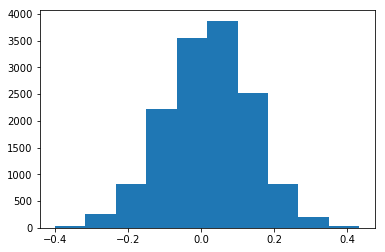

In [168]:
plt.hist(corrs.ExplizitesLernen_kont)

(array([2.000e+00, 3.000e+00, 1.260e+02, 1.597e+03, 4.978e+03, 5.048e+03,
        2.001e+03, 4.820e+02, 9.400e+01, 4.000e+00]),
 array([-0.54101314, -0.43561802, -0.33022289, -0.22482776, -0.11943264,
        -0.01403751,  0.09135761,  0.19675274,  0.30214786,  0.40754299,
         0.51293812]),
 <a list of 10 Patch objects>)

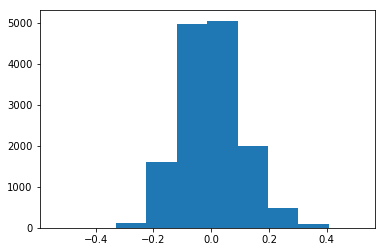

In [169]:
plt.hist(corrs.ImplizitesLernen_kont)

# get intercorrelations

In [172]:
from sklearn.cluster import SpectralBiclustering

In [15]:
corrs = joinedDF.corr()

In [16]:
corrs = corrs.fillna(0)

In [171]:
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

In [176]:
corrs_abs = corrs.abs()

In [174]:
n_clusters = 3

model = SpectralBiclustering(n_clusters=n_clusters,method='log',
                             n_jobs =-1,
                             random_state=0).fit(corrs_abs)

order_data = np.argsort(model.row_labels_)

corrs_resorted = corrs.iloc[order_data,order_data]

fig, ax = plt.subplots(figsize=(15,20))         # Sample figsize in inches

sns.heatmap(corrs_resorted, cmap="coolwarm_r",vmin=-1, vmax=1  , mask=mask,
            linewidths=.2, 
    xticklabels=True, yticklabels=True,
            ax=ax)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Correlation Heatmap for Amplitude Mean

In [10]:
corrs.head()

ExplizitesLernen_kont  ImplizitesLernen_kont
evoked_Amplitude_Mean_Fp1_0              -0.079046              -0.101817
evoked_Amplitude_Mean_Fp1_1              -0.075011              -0.046107
evoked_Amplitude_Mean_Fp1_2              -0.042912              -0.052749
evoked_Amplitude_Mean_Fp1_3               0.179289              -0.132685
evoked_Amplitude_Mean_Fp1_4               0.337929              -0.186762

In [17]:
ev.ch_names

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FCz',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'O1',
 'O2',
 'TP9',
 'TP10']

In [20]:
corrs_evAM_ = corrs[corrs.index.str.contains("evoked_Amplitude_Mean")]

In [22]:
corrs_evAM_["comp"] = corrs_evAM_.index.str.split("_").str[-2]
corrs_evAM_["time"] = corrs_evAM_.index.str.split("_").str[-1]

I:\Miniconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
I:\Miniconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
corrs_evAM_.head()

evoked_Amplitude_Mean_Fp1_0  \
evoked_Amplitude_Mean_Fp1_0                     1.000000   
evoked_Amplitude_Mean_Fp1_1                     0.826566   
evoked_Amplitude_Mean_Fp1_2                     0.695850   
evoked_Amplitude_Mean_Fp1_3                     0.428013   
evoked_Amplitude_Mean_Fp1_4                     0.228606   

                             evoked_Amplitude_Mean_Fp1_1  \
evoked_Amplitude_Mean_Fp1_0                     0.826566   
evoked_Amplitude_Mean_Fp1_1                     1.000000   
evoked_Amplitude_Mean_Fp1_2                     0.873735   
evoked_Amplitude_Mean_Fp1_3                     0.537224   
evoked_Amplitude_Mean_Fp1_4                     0.334775   

                             evoked_Amplitude_Mean_Fp1_2  \
evoked_Amplitude_Mean_Fp1_0                     0.695850   
evoked_Amplitude_Mean_Fp1_1                     0.873735   
evoked_Amplitude_Mean_Fp1_2                     1.000000   
evoked_Amplitude_Mean_Fp1_3                     0.644415   
evoked_Amplitude_Mean_Fp1_4                     0.420402   

                             evoked_Amplitude_Mean_Fp1_3  \
evoked_Amplitude_Mean_Fp1_0                     0.428013   
evoked_Amplitude_Mean_Fp1_1                     0.537224   
evoked_Amplitude_Mean_Fp1_2                     0.644415   
evoked_Amplitude_Mean_Fp1_3                     1.000000   
evoked_Amplitude_Mean_Fp1_4                     0.850366   

                             evoked_Amplitude_Mean_Fp1_4  \
evoked_Amplitude_Mean_Fp1_0                     0.228606   
evoked_Amplitude_Mean_Fp1_1                     0.334775   
evoked_Amplitude_Mean_Fp1_2                     0.420402   
evoked_Amplitude_Mean_Fp1_3                     0.850366   
evoked_Amplitude_Mean_Fp1_4                     1.000000   

                             evoked_Amplitude_Mean_Fp1_5  \
evoked_Amplitude_Mean_Fp1_0                     0.056586   
evoked_Amplitude_Mean_Fp1_1                     0.195397   
evoked_Amplitude_Mean_Fp1_2                     0.275491   
evoked_Amplitude_Mean_Fp1_3                     0.544354   
evoked_Amplitude_Mean_Fp1_4                     0.762119   

                             evoked_Amplitude_Mean_Fp1_6  \
evoked_Amplitude_Mean_Fp1_0                     0.292760   
evoked_Amplitude_Mean_Fp1_1                     0.381636   
evoked_Amplitude_Mean_Fp1_2                     0.387596   
evoked_Amplitude_Mean_Fp1_3                     0.373221   
evoked_Amplitude_Mean_Fp1_4                     0.410025   

                             evoked_Amplitude_Mean_Fp1_7  \
evoked_Amplitude_Mean_Fp1_0                     0.569168   
evoked_Amplitude_Mean_Fp1_1                     0.682818   
evoked_Amplitude_Mean_Fp1_2                     0.652099   
evoked_Amplitude_Mean_Fp1_3                     0.476321   
evoked_Amplitude_Mean_Fp1_4                     0.388818   

                             evoked_Amplitude_Mean_Fp2_0  \
evoked_Amplitude_Mean_Fp1_0                     0.964635   
evoked_Amplitude_Mean_Fp1_1                     0.791959   
evoked_Amplitude_Mean_Fp1_2                     0.663182   
evoked_Amplitude_Mean_Fp1_3                     0.392334   
evoked_Amplitude_Mean_Fp1_4                     0.177171   

                             evoked_Amplitude_Mean_Fp2_1  ...   \
evoked_Amplitude_Mean_Fp1_0                     0.803988  ...    
evoked_Amplitude_Mean_Fp1_1                     0.958786  ...    
evoked_Amplitude_Mean_Fp1_2                     0.841846  ...    
evoked_Amplitude_Mean_Fp1_3                     0.470914  ...    
evoked_Amplitude_Mean_Fp1_4                     0.251826  ...    

                             evoked_Autocorrel_Lag20_TP10_4  \
evoked_Amplitude_Mean_Fp1_0                        0.009188   
evoked_Amplitude_Mean_Fp1_1                       -0.069143   
evoked_Amplitude_Mean_Fp1_2                       -0.008364   
evoked_Amplitude_Mean_Fp1_3                        0.021405   
evoked_Amplitude_Mean_Fp1_4                       -0.055195   

    

In [29]:
corrs_evAM_expl = corrs_evAM_.pivot_table("ExplizitesLernen_kont","comp","time")
corrs_evAM_expl.columns = [str(int(x)+1)+"00" for x in corrs_evAM_expl.columns]
corrs_evAM_expl.index.name = None
corrs_evAM_expl = corrs_evAM_expl.loc[ev.ch_names,]

In [30]:
corrs_evAM_impl = corrs_evAM_.pivot_table("ImplizitesLernen_kont","comp","time")

corrs_evAM_impl.columns = [str(int(x)+1)+"00" for x in corrs_evAM_impl.columns]
corrs_evAM_impl.index.name = None

corrs_evAM_impl = corrs_evAM_impl.loc[ev.ch_names,]

In [31]:
corrs_evAM_impl = corrs_evAM_impl*(-1)

I:\Miniconda\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


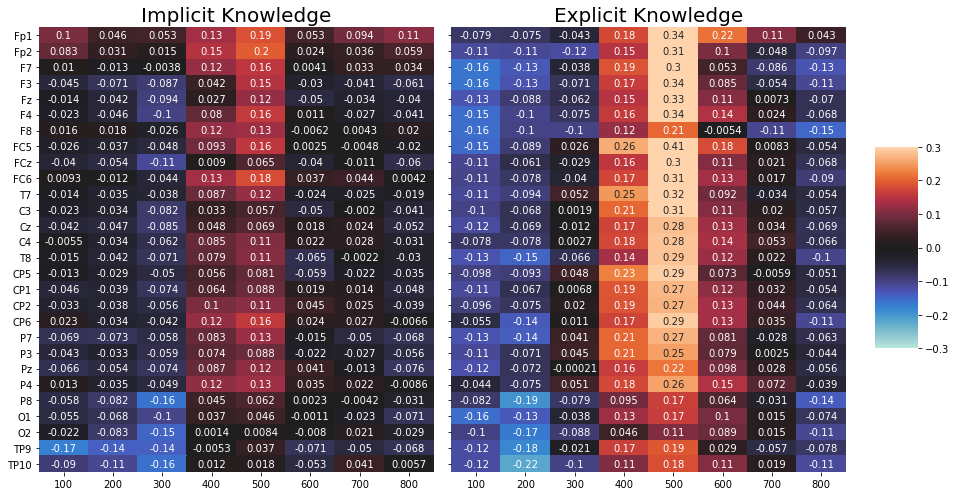

In [32]:
dfs = [corrs_evAM_impl,corrs_evAM_expl]

fig, axn = plt.subplots(1, 2, sharey=True,figsize=(20,7))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    x = sns.heatmap(dfs[i], ax=ax,
                    yticklabels=True,
                            center=0,vmin=-.3,vmax=.3,                              
                    annot=True,
                cbar=i == 0,                
                cbar_ax=None if i else cbar_ax)
    ax.vlines([50], *ax.get_xlim(),colors='white')

cols = ["Implicit Knowledge","Explicit Knowledge"]


for ax, col in zip(axn, cols):
    ax.set_title(col,size=20)


fig.tight_layout(rect=[0.3, 0, .9, 1])

# Intercorrelation between amplitude featues

In [47]:
from sklearn.cluster import SpectralBiclustering

In [12]:
cols =joinedDF.columns.str.contains("evoked_Amplitude_Mean")

In [370]:
intercorr = joinedDF.loc[:,cols].corr()

In [48]:
intercorr_abs = intercorr.abs()

In [371]:
mask = np.zeros_like(intercorr)
mask[np.triu_indices_from(mask)] = True

In [59]:
intercorr.head()

evoked_Amplitude_Mean_Fp1_0  \
evoked_Amplitude_Mean_Fp1_0                     1.000000   
evoked_Amplitude_Mean_Fp1_1                     0.826566   
evoked_Amplitude_Mean_Fp1_2                     0.695850   
evoked_Amplitude_Mean_Fp1_3                     0.428013   
evoked_Amplitude_Mean_Fp1_4                     0.228606   

                             evoked_Amplitude_Mean_Fp1_1  \
evoked_Amplitude_Mean_Fp1_0                     0.826566   
evoked_Amplitude_Mean_Fp1_1                     1.000000   
evoked_Amplitude_Mean_Fp1_2                     0.873735   
evoked_Amplitude_Mean_Fp1_3                     0.537224   
evoked_Amplitude_Mean_Fp1_4                     0.334775   

                             evoked_Amplitude_Mean_Fp1_2  \
evoked_Amplitude_Mean_Fp1_0                     0.695850   
evoked_Amplitude_Mean_Fp1_1                     0.873735   
evoked_Amplitude_Mean_Fp1_2                     1.000000   
evoked_Amplitude_Mean_Fp1_3                     0.644415   
evoked_Amplitude_Mean_Fp1_4                     0.420402   

                             evoked_Amplitude_Mean_Fp1_3  \
evoked_Amplitude_Mean_Fp1_0                     0.428013   
evoked_Amplitude_Mean_Fp1_1                     0.537224   
evoked_Amplitude_Mean_Fp1_2                     0.644415   
evoked_Amplitude_Mean_Fp1_3                     1.000000   
evoked_Amplitude_Mean_Fp1_4                     0.850366   

                             evoked_Amplitude_Mean_Fp1_4  \
evoked_Amplitude_Mean_Fp1_0                     0.228606   
evoked_Amplitude_Mean_Fp1_1                     0.334775   
evoked_Amplitude_Mean_Fp1_2                     0.420402   
evoked_Amplitude_Mean_Fp1_3                     0.850366   
evoked_Amplitude_Mean_Fp1_4                     1.000000   

                             evoked_Amplitude_Mean_Fp1_5  \
evoked_Amplitude_Mean_Fp1_0                     0.056586   
evoked_Amplitude_Mean_Fp1_1                     0.195397   
evoked_Amplitude_Mean_Fp1_2                     0.275491   
evoked_Amplitude_Mean_Fp1_3                     0.544354   
evoked_Amplitude_Mean_Fp1_4                     0.762119   

                             evoked_Amplitude_Mean_Fp1_6  \
evoked_Amplitude_Mean_Fp1_0                     0.292760   
evoked_Amplitude_Mean_Fp1_1                     0.381636   
evoked_Amplitude_Mean_Fp1_2                     0.387596   
evoked_Amplitude_Mean_Fp1_3                     0.373221   
evoked_Amplitude_Mean_Fp1_4                     0.410025   

                             evoked_Amplitude_Mean_Fp1_7  \
evoked_Amplitude_Mean_Fp1_0                     0.569168   
evoked_Amplitude_Mean_Fp1_1                     0.682818   
evoked_Amplitude_Mean_Fp1_2                     0.652099   
evoked_Amplitude_Mean_Fp1_3                     0.476321   
evoked_Amplitude_Mean_Fp1_4                     0.388818   

                             evoked_Amplitude_Mean_Fp2_0  \
evoked_Amplitude_Mean_Fp1_0                     0.964635   
evoked_Amplitude_Mean_Fp1_1                     0.791959   
evoked_Amplitude_Mean_Fp1_2                     0.663182   
evoked_Amplitude_Mean_Fp1_3                     0.392334   
evoked_Amplitude_Mean_Fp1_4                     0.177171   

                             evoked_Amplitude_Mean_Fp2_1  \
evoked_Amplitude_Mean_Fp1_0                     0.803988   
evoked_Amplitude_Mean_Fp1_1                     0.958786   
evoked_Amplitude_Mean_Fp1_2                     0.841846   
evoked_Amplitude_Mean_Fp1_3                     0.470914   
evoked_Amplitude_Mean_Fp1_4                     0.251826   

                                         ...               \
evoked_Amplitude_Mean_Fp1_0              ...                
evoked_Amplitude_Mean_Fp1_1              ...                
evoked_Amplitude_Mean_Fp1_2              ...                
evoked_Amplitude_Mean_Fp1_3              ...                
evoked_Amplitude_Mean_Fp1_4              ...                

                             evoked_Amplitude_Mean_T

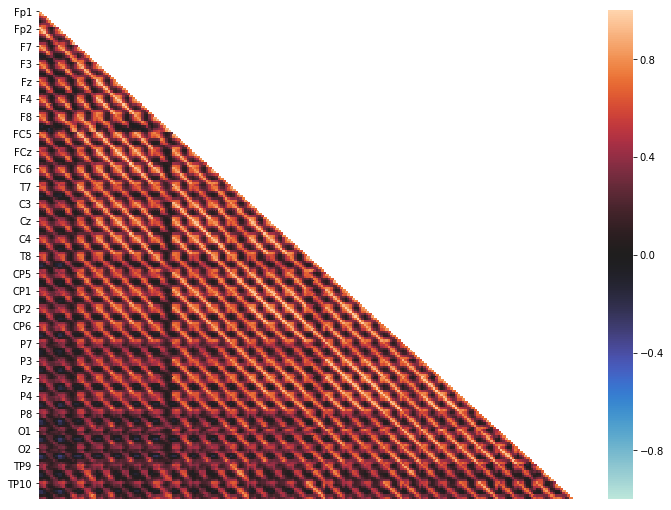

In [372]:
n_clusters = 1

model = SpectralBiclustering(n_clusters=n_clusters,method='log',
                             random_state=0).fit(intercorr_abs)

order_data = np.argsort(model.row_labels_)

corrs_resorted = intercorr.iloc[order_data,order_data]

intercorr.index = intercorr.index.str.split("_").str[-2]

fig, ax = plt.subplots(figsize=(12,9))         # Sample figsize in inches

sns.heatmap(intercorr, # cmap="coolwarm_r",
            center=0,
            vmin=-1, vmax=1  , mask=mask,
            #linewidths=.2, 
    xticklabels=False, yticklabels=8,
            ax=ax)

# ERP Component identification through Facto analysis

In [13]:
ampMeanDf =joinedDF.loc[:,cols]
ampMeanDf['Subject_ID'] = ampMeanDf.index
ampMeanDf_long = pd.melt(ampMeanDf,id_vars=['Subject_ID'],  value_vars=ampMeanDf.columns[:-1])
ampMeanDf_long["comp"] = ampMeanDf_long.variable.str.split("_").str[-2]
ampMeanDf_long["time"] = ampMeanDf_long.variable.str.split("_").str[-1]

I:\Miniconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
temp_df = ampMeanDf_long.pivot_table(index=["Subject_ID","comp"],columns="time",values="value")
spat_df = ampMeanDf_long.pivot_table(index=["Subject_ID","time"],columns="comp",values="value")
spatTemp_df = ampMeanDf_long.pivot_table(index=["Subject_ID",],columns=["time",'comp'],values="value")

In [112]:
from sklearn.decomposition import PCA

## numer of components

Text(0.5, 1.0, 'SpatTemp')

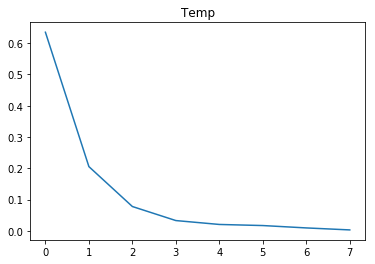

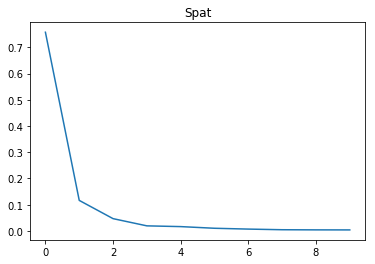

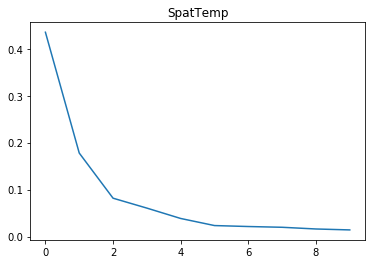

In [116]:
plt.figure()
pca_temp = PCA(8,random_state=23).fit(temp_df)
plt.plot(range(8),pca_temp.explained_variance_ratio_ )
plt.title("Temp")
#4


plt.figure()
pca_spat = PCA(10,random_state=23).fit(spat_df)
plt.plot(range(10),pca_spat.explained_variance_ratio_ )
plt.title("Spat")
#4

plt.figure()
pca_spatTemp = PCA(10,random_state=23).fit(spatTemp_df)
plt.plot(range(10),pca_spatTemp.explained_variance_ratio_ )
plt.title("SpatTemp")
#6


4, 4, 6 Komponenten

## temporal PCA/FA with all data

In [379]:
all_data_list = []
for evo in evokeds:
    
    id_ = evo.split("-")[0]
    print(id_)
    ev = mne.read_evokeds("../09_PreparationEEG/evoked/"+evo)[0]
    data = ev.data
    #data = data.flatten()
    all_data_list.append(data)

AAR23B1
Reading ../09_PreparationEEG/evoked/AAR23B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 240 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
ACE11B1
Reading ../09_PreparationEEG/evoked/ACE11B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 238 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
ADD25P1
Reading ../09_PreparationEEG/evoked/ADD25P1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.26 * stim_1 + 0.26 * stim_2 + 0.24 * stim_3 + 0.24 * stim_4)

        0 CTF compensation matrices available
        nave = 238 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
BMR01N1
Reading ../09_PreparationEEG/evoked/BMR01N1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.23 * stim_1 + 0.26 * stim_2 + 0.26 * stim_3 + 0.24 * stim_4)
        0 CTF compensation matrices available
        nave = 197 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
BRH18F1
Reading ../09_PreparationEEG/evoked/BRH18F1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 240 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
B

GKN11N1
Reading ../09_PreparationEEG/evoked/GKN11N1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 240 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
GWD17F1
Reading ../09_PreparationEEG/evoked/GWD17F1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 240 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
HHB22B1
Reading ../09_PreparationEEG/evoked/HHB22B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)

        0 CTF compensation matrices available
        nave = 239 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
LRM12B1
Reading ../09_PreparationEEG/evoked/LRM12B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 239 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
MAI03B1
Reading ../09_PreparationEEG/evoked/MAI03B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 236 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
M

SJA02B1
Reading ../09_PreparationEEG/evoked/SJA02B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.25 * stim_2 + 0.25 * stim_3 + 0.25 * stim_4)
        0 CTF compensation matrices available
        nave = 236 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
SJN01B1
Reading ../09_PreparationEEG/evoked/SJN01B1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.24 * stim_2 + 0.23 * stim_3 + 0.28 * stim_4)
        0 CTF compensation matrices available
        nave = 181 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
No baseline correction applied
SJO18S1
Reading ../09_PreparationEEG/evoked/SJO18S1-ave.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (0.25 * stim_1 + 0.27 * stim_2 + 0.25 * stim_3 + 0.24 * stim_4)

In [380]:
all_data_list = np.array(all_data_list)

all_data = all_data_list[:,:,51:]


In [381]:
all_data.shape

(96, 28, 200)

In [382]:
temp_pca = all_data.reshape([96*28,200])

Text(0.5, 1.0, 'Temp')

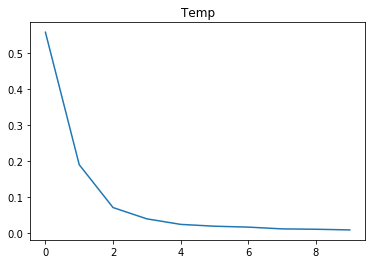

In [383]:
plt.figure()
pca_temp = PCA(10,random_state=23).fit(temp_pca)
plt.plot(range(10),pca_temp.explained_variance_ratio_ )
plt.title("Temp")
#4

In [384]:
fa_temp_promax = FactorAnalyzer(4, "promax").fit(temp_pca)

In [541]:
df_argmax =pd.DataFrame(np.argmax(np.abs(fa_temp_promax.loadings_), axis=1).reshape(1,200))

df_argmax.columns = df_argmax.columns*4

df_tempweights =pd.DataFrame(fa_temp_promax.loadings_,index= df_argmax.columns,
             columns=["Temporal Factor 1",
                      "Temporal Factor 2",
                      "Temporal Factor 3",
                      "Temporal Factor 4"])

df_tempweights_long=pd.melt(
df_tempweights.reset_index(),
id_vars="index",
value_vars=df_tempweights.columns

)

df_tempweights_long.columns = ["Time","Factor","Loadings"]

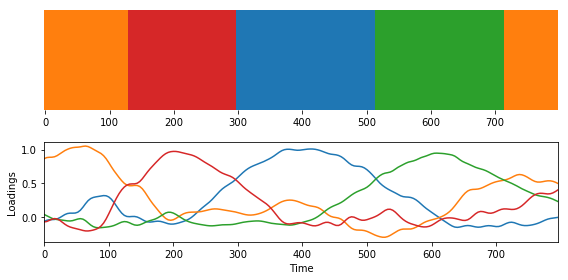

In [542]:

fig, axn = plt.subplots(2, 1, sharex=False, sharey=False,figsize=(8,4))

sns.heatmap(
        df_argmax,
    cmap=sns.color_palette(n_colors=4),
    xticklabels=25,
    yticklabels=False,
    vmin=0,vmax=3,
    cbar=False,ax=axn[0]
    )

sns.lineplot(data=df_tempweights_long,
         x="Time",
         y="Loadings"
,hue="Factor",

    ax=axn[1], legend=False
        )
axn[1].margins(x=0)
    
                  
fig.tight_layout(rect=[0, 0, 1, 1])

## spatial PC/FA with all data

In [394]:
spat_pca = np.moveaxis(all_data,2,1).reshape([96*200,28])

Text(0.5, 1.0, 'SpatTemp')

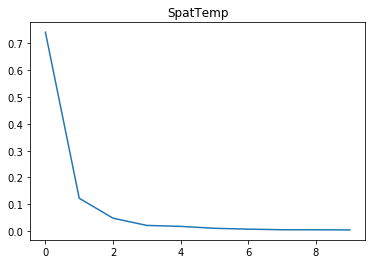

In [395]:
plt.figure()
pca_spatTemp = PCA(10,random_state=23).fit(spat_pca)
plt.plot(range(10),pca_spatTemp.explained_variance_ratio_ )
plt.title("SpatTemp")
#4


In [396]:
fa_spat_promax = FactorAnalyzer(4, "promax").fit(spat_pca)


In [509]:
df_spatweights.index = ev.ch_names

In [544]:
df_argmax =pd.DataFrame(np.argmax(np.abs(fa_spat_promax.loadings_), axis=1).reshape(1,28))


df_spatweights =pd.DataFrame(fa_spat_promax.loadings_,index= df_argmax.columns,
             columns=["Spatial Factor 1",
                      "Spatial Factor 2",
                      "Spatial Factor 3",
                      "Spatial Factor 4"])

df_spatweights.index = ev.ch_names

df_spatweights_long=pd.melt(
df_spatweights.reset_index(),
id_vars="index",
value_vars=df_spatweights.columns

)

df_spatweights_long.columns = ["Channel","Factor","Loadings"]

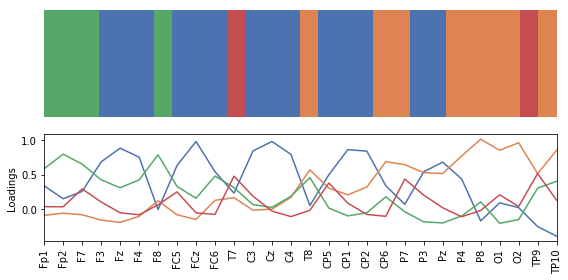

In [545]:

fig, axn = plt.subplots(2, 1, sharex=False, sharey=False,figsize=(8,4))

sns.heatmap(
        df_argmax,
    cmap=sns.color_palette('deep',n_colors=4),
    yticklabels=False,
    xticklabels=False,
    vmin=0,vmax=3,
    cbar=False,
    ax=axn[0]
    )

xy= sns.lineplot(data=df_spatweights_long,
         x="Channel",
         y="Loadings"
,hue="Factor", palette =sns.color_palette('deep',n_colors=4),
sort=False,
    ax=axn[1], legend=False
        )
xy.set_xlabel('')
xy.set_xticklabels(ev.ch_names, rotation=90)

axn[1].margins(x=0)
                  
fig.tight_layout(rect=[0, 0, 1, 1])

In [535]:
ev.data.shape

(28, 251)

In [538]:
ev2  = ev.copy()

In [548]:
ev2.data= fa_spat_promax.loadings_

In [547]:
fa_spat_promax.loadings_.shape

(28, 4)

In [567]:
mask =fa_spat_promax.loadings_ *0== 0

In [573]:
ev2.ch_names

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FCz',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'O1',
 'O2',
 'TP9',
 'TP10']

##  Parallel Temporal and Spatial FA: zuordnung zu den komponenten via promax roation und argmax

### Factor analyse

In [15]:
from factor_analyzer import FactorAnalyzer

In [ ]:
fa_temp_promax = FactorAnalyzer(4, "promax").fit(temp_df)

fa_spat_promax = FactorAnalyzer(4, "promax").fit(spat_df)

In [16]:
fa_spatTemp_promax= FactorAnalyzer(6, "promax",).fit(spatTemp_df)

### zuordnung über argmax und visualisieung

Text(0.5, 1.0, 'Spatial promax')

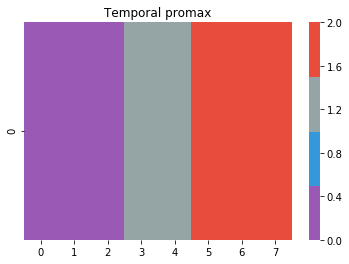

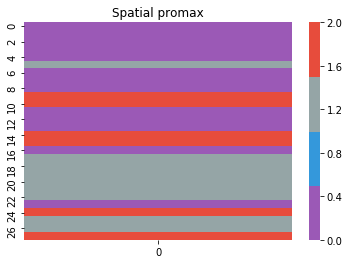

In [125]:
plt.figure()
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c",]

sns.heatmap(
    #fa_promax.loadings_
    np.argmax(np.abs(fa_temp_promax.loadings_), axis=1).reshape(1,8),
    cmap=sns.color_palette(flatui),
    
    vmin=0,vmax=2,
    )
plt.title("Temporal promax")


plt.figure()
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c",]

sns.heatmap(
    #fa_promax.loadings_
    np.argmax(np.abs(fa_spat_promax.loadings_), axis=1).reshape(28,1),
    cmap=sns.color_palette(flatui),
    
    vmin=0,vmax=2,
    )
plt.title("Spatial promax")

In [331]:
df__ = pd.DataFrame(columns=spatTemp_df.columns            )

df__.loc[0,:] = np.argmax(np.abs(fa_spatTemp_promax.loadings_), axis=1)

df__ = pd.melt(df__).pivot_table(values="value",
    index="comp",
    columns="time")

df__=df__.loc[ev.ch_names,:]
df__.columns= [str(int(x)+1)+"00" for x in df__.columns]
df__ = df__+1

Text(0.5, 1.0, 'TempSpatial promax')

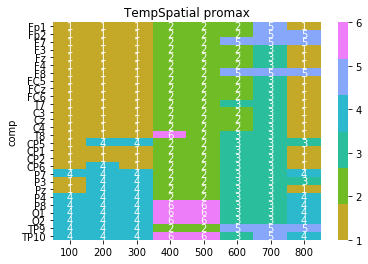

In [332]:
sns.heatmap(
    #fa_promax.loadings_
    df__ ,
    annot=True,
    yticklabels=True,
    cmap=rgb_list
    )
plt.title("TempSpatial promax")

In [323]:
sns.color_palette([1,20,50])

ValueError: Could not generate a palette for <map object at 0x000001DA68C8EE80>

In [ ]:
fa_spatTemp_promax= FactorAnalyzer(6, "promax").fit(spatTemp_df)

In [149]:
fa_spatTemp_promax.transform(spatTemp_df).shape

(95, 6)

In [153]:
sns.palplot(sns.husl_palette(36,s=0.95, l=0.7))

### heatmaps für die einzelenn komponenten


In [178]:
fa_spatTemp_promax.loadings_.shape

(224, 6)

In [234]:
def get_heatmapPCAComponent(fa_loadings,i):
    df__ = pd.DataFrame(columns=spatTemp_df.columns            )

    df__.loc[0,:] = fa_loadings[:,i]

    
    df__ = pd.melt(df__).pivot_table(values="value",
        index="comp",
        columns="time", aggfunc='first')
    df__=df__.loc[ev.ch_names,:]
    df__.columns= [str(int(x)+1)+"00" for x in df__.columns]
    return df__
    

In [343]:
def getCmap(i):
    hue_neg = 30
    hue_pos = 40+i*(280/6)
    hue_neg = 0
    cmap= sns.diverging_palette(hue_neg, hue_pos, 
                                s=95,l=70 ,as_cmap=True)
    return cmap

In [344]:
# HULS colours for factors:
HUSL = [40+i*(280/6) for i in range(6)]

__converted to HMTL using transformator__
http://www.hsluv.org/



In [345]:
rgb_list= []

for hs in HUSL:
    rgb_list += sns.husl_palette(1,hs/360,95/100,70/100)

Text(0.5, 1.0, 'Strongest Loading Factors')

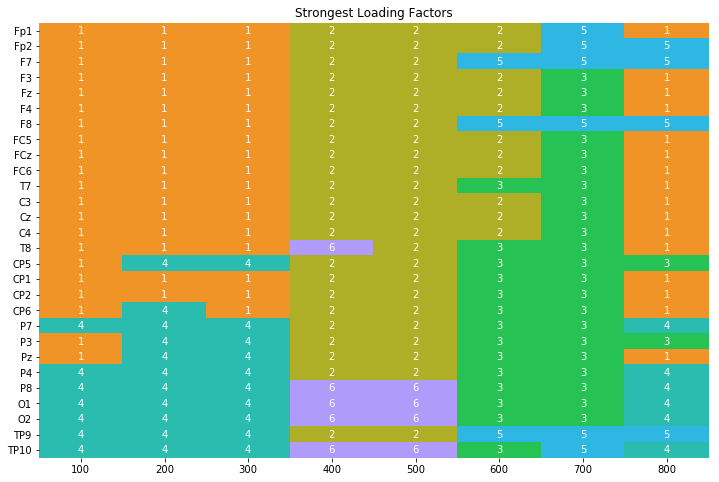

In [348]:
df__ = pd.DataFrame(columns=spatTemp_df.columns            )

df__.loc[0,:] = np.argmax(np.abs(fa_spatTemp_promax.loadings_), axis=1)

df__ = pd.melt(df__).pivot_table(values="value",
    index="comp",
    columns="time")

df__=df__.loc[ev.ch_names,:]
df__.columns= [str(int(x)+1)+"00" for x in df__.columns]
df__ = df__+1

plt.figure(figsize = (12,8))
sns.heatmap(
    #fa_promax.loadings_
    df__ ,
    annot=True,
    yticklabels=True,
    cmap=rgb_list,
                cbar=False,                
            cbar_ax=None,
    ).set_ylabel('')
plt.title("Strongest Loading Factors")


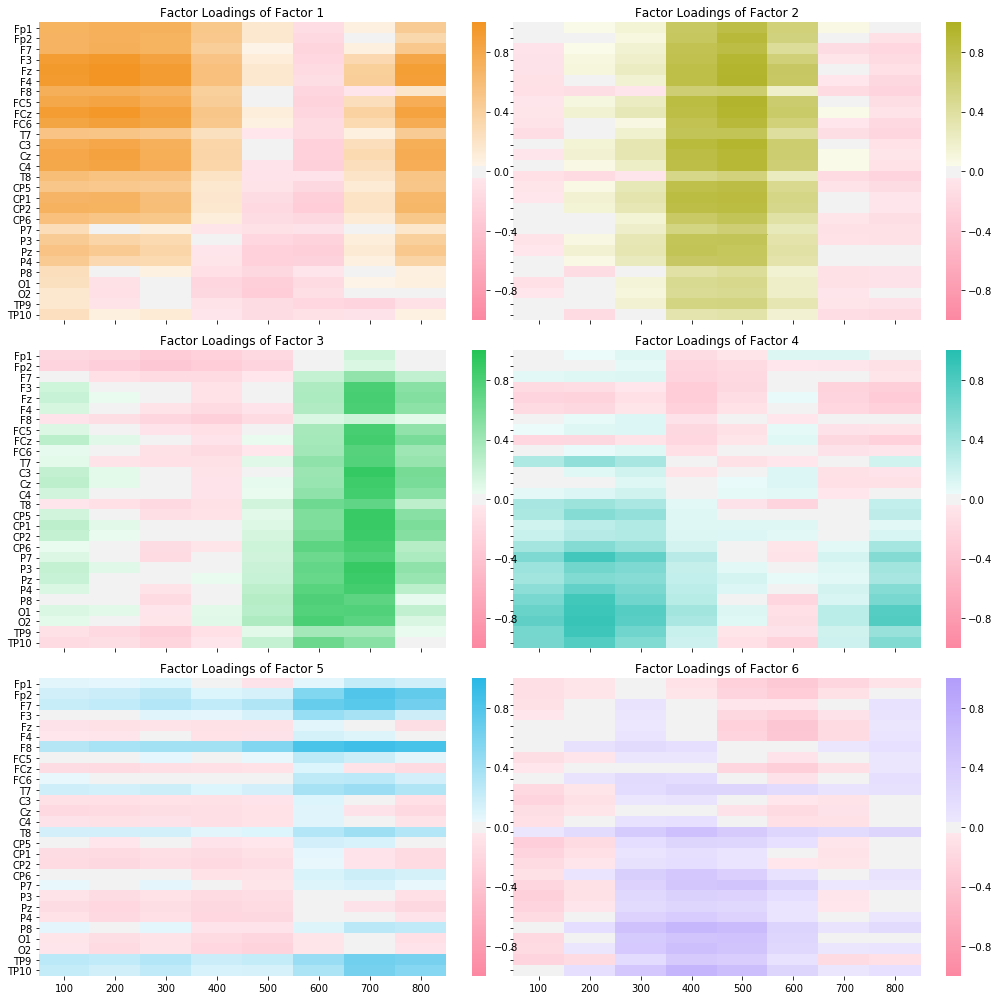

In [349]:

fig, axn = plt.subplots(3, 2, sharex=True, sharey=True,figsize=(24,14))


for i, ax in enumerate(axn.flat):
    df__  = get_heatmapPCAComponent(fa_spatTemp_promax.loadings_,i)
    cmap = getCmap(i)
    x = sns.heatmap(
        df__, 
        ax=ax,
        center=0,
        yticklabels=True,
         vmax =1,
     vmin =-1,      
            #cbar=False,                
            
        
    cmap=cmap
    )
    ax.set_title("Factor Loadings of Factor "+str(i+1))
    ax.set_ylabel('')    
    ax.set_xlabel('')
    
                   
fig.tight_layout(rect=[0.3, 0, .9, 1])

## Korrelation mit AVs

I:\Miniconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


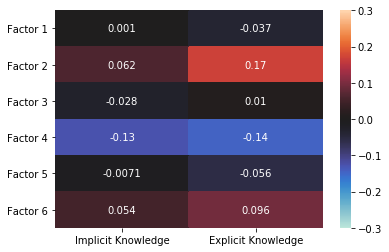

In [366]:
df_spatTempComp["ImplizitesLernen_kont"] = 0-df_spatTempComp["ImplizitesLernen_kont"]

corrdf = df_spatTempComp.corr().loc[:,["ImplizitesLernen_kont","ExplizitesLernen_kont"]].filter(like="spatTempPC_",axis=0)
corrdf.index = ['Factor '+str(x) for x in [1,2,3,4,5,6]]
corrdf.columns = [ "Implicit Knowledge","Explicit Knowledge" ]
plt.figure()
sns.heatmap(corrdf,vmin=-0.3,center=0,vmax=.3,annot=True)